# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [13]:
#!pip install matplotlib
#!pip install scikit-learn
#!pip install pandas
#!pip install ucimlrepo
#!pip install certifi

     -------------------------------------- 163.8/163.8 KB 1.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

Text(0, 0.5, 'y')

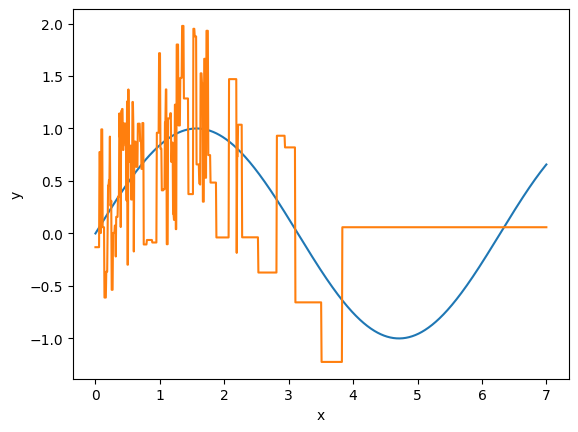

In [4]:
from sklearn.tree import DecisionTreeRegressor

# Генерируем выборку x из экспоненциального распределения
x = np.random.exponential(size=sample_size)

# Создаем вектор целевых переменных y
noise = np.random.uniform(low=-1, high=1, size=sample_size)  # Шум
y = f(x) + noise

# Обучаем DecisionTreeRegressor
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
tree = DecisionTreeRegressor()
tree.fit(x, y)

# Создаем объекты для предсказания (linspace)
true_results = []
desicion_tree_results = []

for x in linspace:
    true_results.append(f(x))
    desicion_tree_results.append(tree.predict([[x]])[0])

# Строим график
plt.plot(linspace, true_results, label="f(x)")
plt.plot(linspace, desicion_tree_results, label="decision tree prediction")
plt.xlabel("x")
plt.ylabel("y")

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

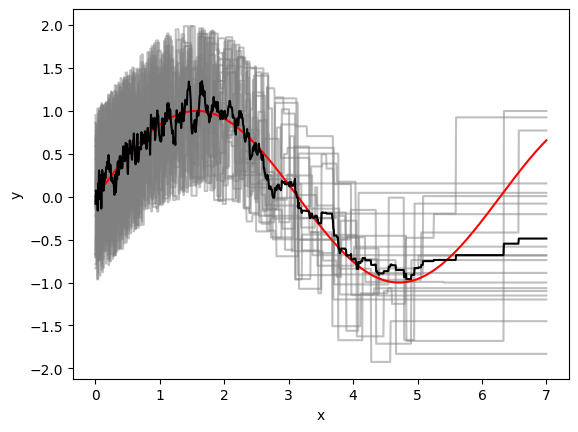

In [5]:
def depth(maximum_depth = None):
    trees = []
    for _ in range(samples_num):
        x = np.random.exponential(size=sample_size)

        noise = np.random.uniform(low=-1, high=1, size=sample_size)  
        y = f(x) + noise

        x = np.reshape(x, (-1, 1))
        y = np.reshape(y, (-1, 1))
        tree = DecisionTreeRegressor(max_depth=maximum_depth)
        tree.fit(x, y)

        desicion_tree_results = []

        for x in linspace:
            desicion_tree_results.append(tree.predict([[x]])[0])

        plt.plot(linspace, desicion_tree_results, color="gray", alpha = 0.5)
        plt.xlabel("x")
        plt.ylabel("y")
        trees.append(tree)

    true_results = []
    average_results = []
    for x in linspace:
        true_results.append(f(x))
        average_results.append(0)
        for tree in trees:
            average_results[-1] += tree.predict([[x]])[0]
        average_results[-1] =  0 if samples_num == 0 else average_results[-1] / samples_num
    plt.plot(linspace, true_results, color="red")
    plt.plot(linspace, average_results, color="black")
depth(None)

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

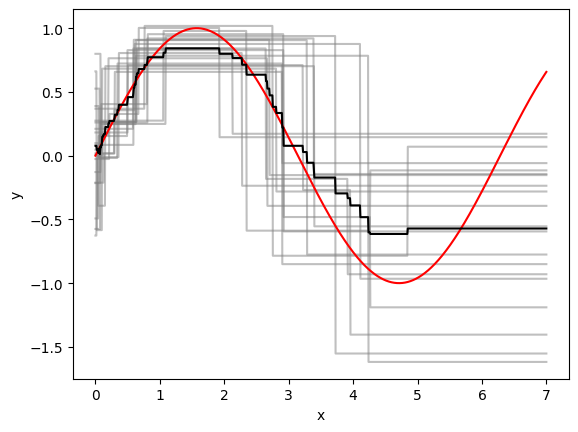

In [6]:
depth(2)

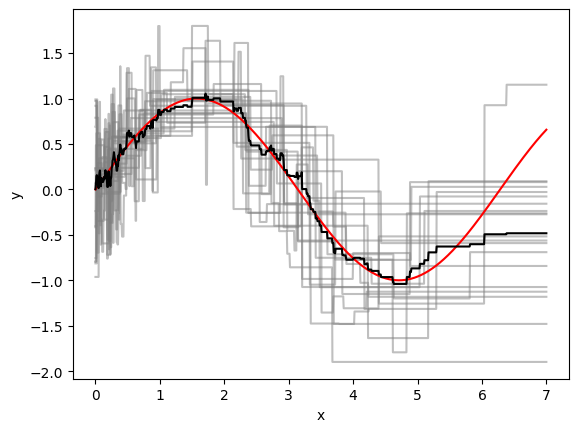

In [7]:
depth(4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:** При max_depth = 4
При больших x у них у всех большое смещение, при меньших у При max_depth меньше всего

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [8]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [9]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from 'c:\\Users\\User\\Documents\\GitHub\\ML1\\task7\\hw3code.py'>

In [10]:
print(data.columns)

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')


<Figure size 640x480 with 0 Axes>

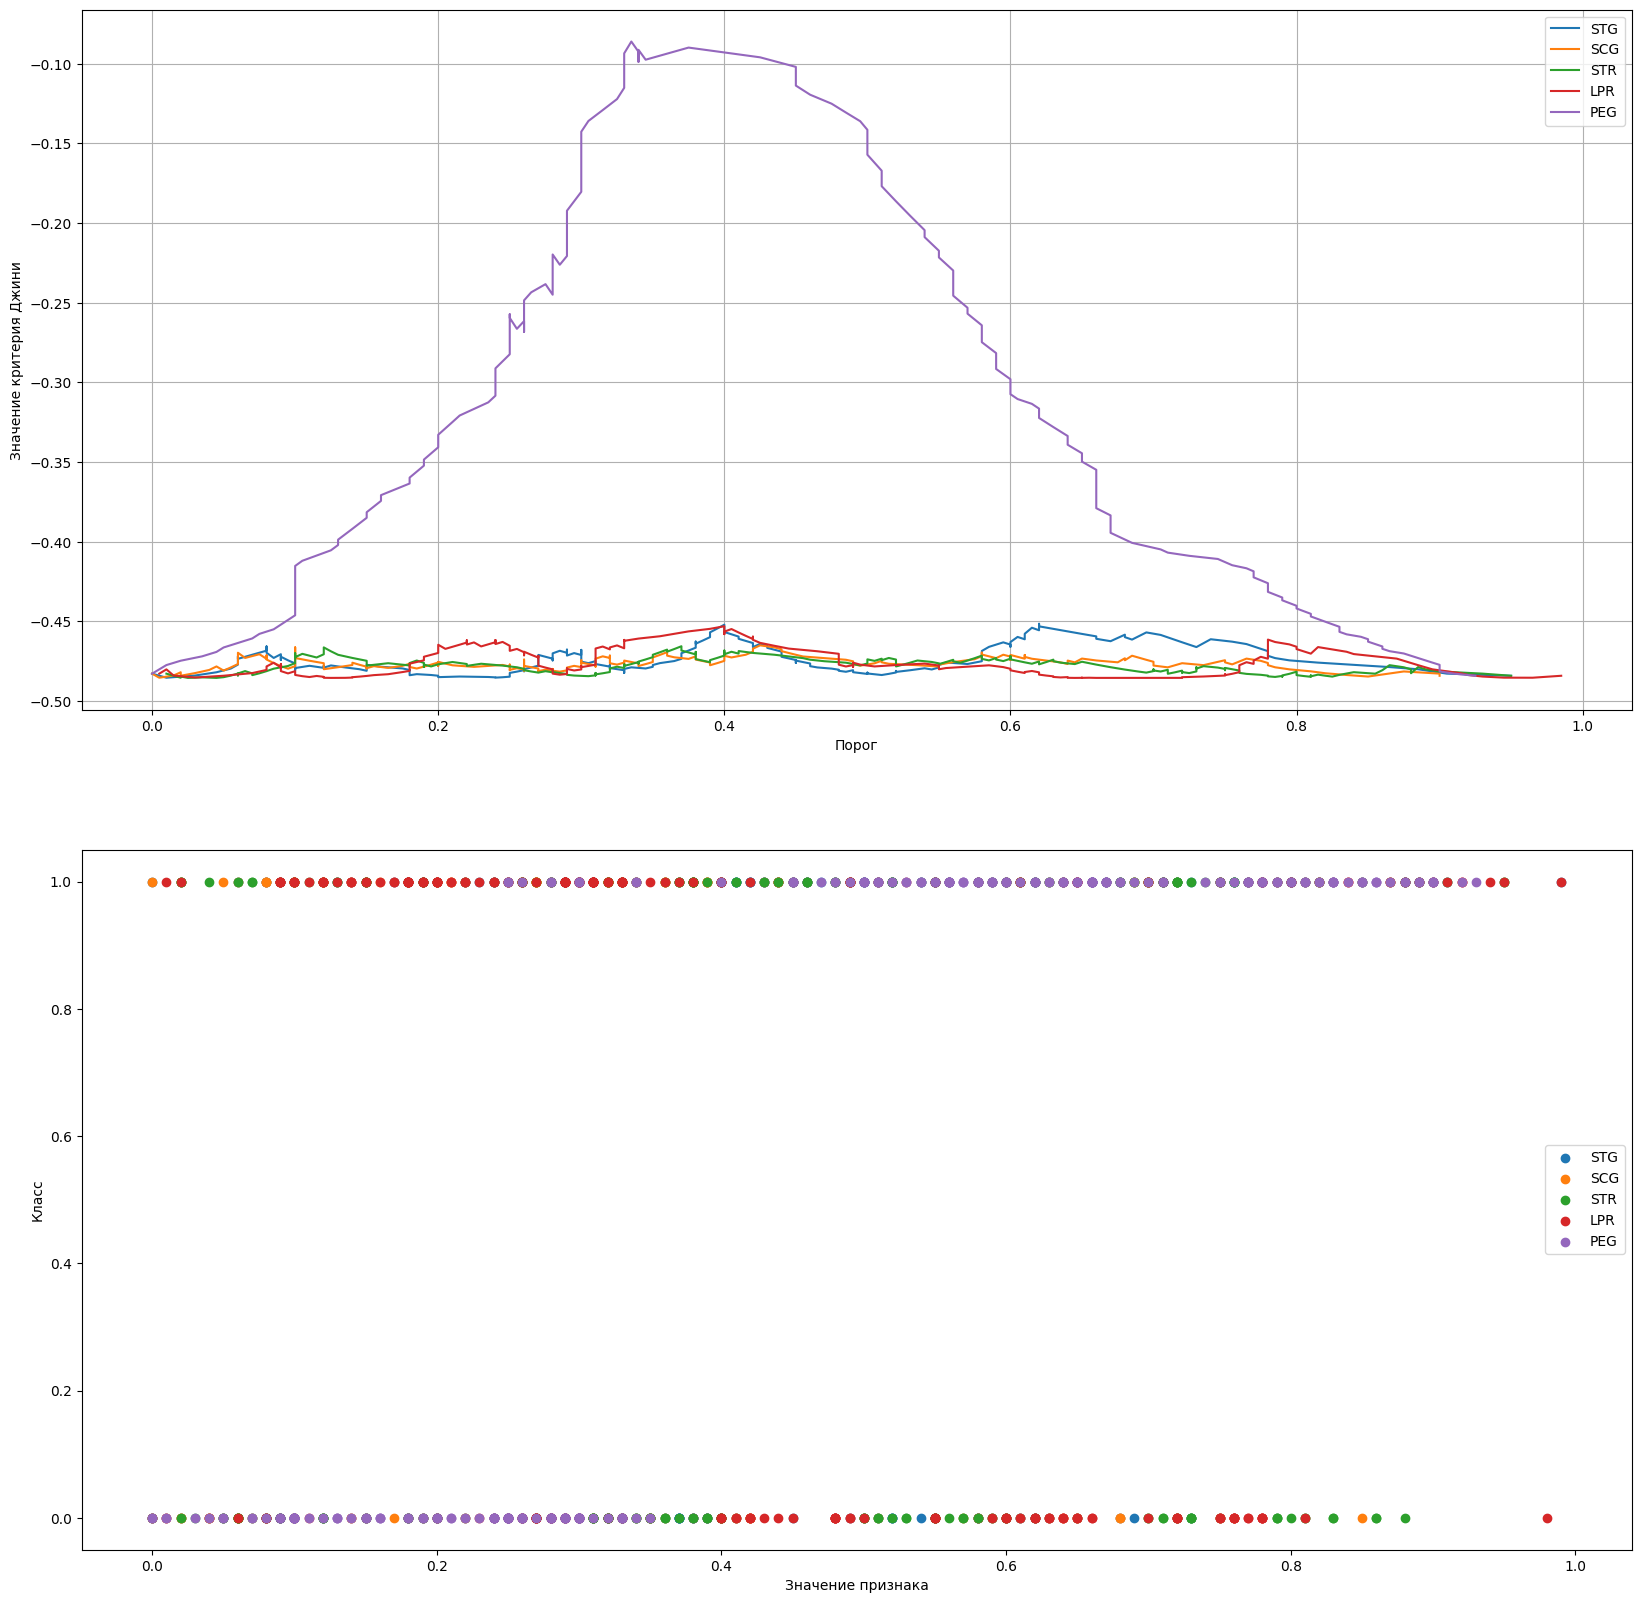

In [11]:
plt.figure()

target = np.copy(data[' UNS'])

x = data.drop(" UNS", axis=1)

fig, axs = plt.subplots(2, 1, figsize=(20, 20))

axs[0].set_xlabel("Порог")
axs[0].set_ylabel("Значение критерия Джини")
axs[1].set_xlabel("Значение признака")
axs[1].set_ylabel("Класс")


for feature in x.columns:
    threshold, gini, thresholds, ginis = hw3code.find_best_split(x[feature], target)
    axs[0].plot(threshold, gini, label=str(feature))
    axs[1].scatter(x[feature], target, label=str(feature))

axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()
plt.legend()
plt.grid()

__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Можно взять PEG, тк на первом графике он сначала возрастает, а потом уменьшается. Так же во втором графике сначала значение равные 0, а после 1


__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [19]:
from ucimlrepo import fetch_ucirepo 
from hw3code import DecisionTree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
import numpy as np
from importlib import reload
import hw3code
reload(hw3code)
  
# Получаем набор данных
mushroom = fetch_ucirepo(id=73) 

# Получаем признаки и целевую переменную
x = mushroom.data.features 
y = np.array(mushroom.data.targets)
features = []

# Преобразуем категориальные признаки с помощью LabelEncoder
for v in x:
    le = LabelEncoder()
    le.fit(x[v])
    x[v] = le.transform(x[v])
    features.append("categorical")


# Преобразуем целевую переменную с помощью LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

x = np.array(x)
y = np.array(y)

# Разделяем данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Создаем экземпляр модели дерева решений
tree = DecisionTree(features)

# Обучаем модель на обучающем наборе данных
tree.fit(x_train, y_train)

# Вычисляем точность
print("accuracy = ", accuracy_score(y_test, tree.predict(x_test)))

accuracy =  0.9982767109798129


Получили значение близкое к 1

### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [25]:
data = pd.read_csv('train.csv')
print(data.columns)

Index(['ID', 'target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=133)


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('train.csv')

samples_num = 10000

data = data.head(samples_num)

missing = data.isnull()

for v in missing:
    z = list(missing[v])
    data[v].loc[z] = 0

y = np.array(data['target'])

data = data.drop('target', axis=1)

bad = []

for v in data:
    t = np.array(data[v])
    if t.dtype != "int64" and t.dtype != "float64":
        bad.append(v)

X = data.drop(bad, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

print("DecisionTreeClassifier", cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=3))
print("BaggingClassifier", cross_val_score(BaggingClassifier(n_estimators=100, n_jobs=-1), X_train, y_train, cv=3))
print("RandomForestClassifier", cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1), X_train, y_train, cv=3))

DecisionTreeClassifier [0.65638389 0.65666524 0.65237891]
BaggingClassifier [0.74807198 0.75010716 0.74967853]
RandomForestClassifier [0.75192802 0.75525075 0.75353622]


#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

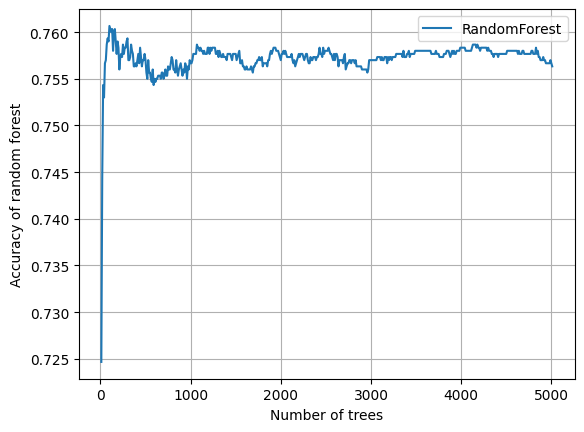

In [29]:
from IPython.display import clear_output

model = RandomForestClassifier(n_estimators = 0, warm_start=True, n_jobs=-1)

step = 10
current_estimators = 0

accuracy = []
estimators = []

def show():
    clear_output(True)
    plt.plot(estimators, accuracy, label="RandomForest")
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy of random forest")

    plt.legend()
    plt.grid()
    plt.show()

for _ in range(0, 5000 // step + 1):
    current_estimators += step
    model.set_params(n_estimators = current_estimators)
    model.fit(X_train, y_train)

    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    estimators.append(current_estimators)

    show()

При увелечение деревьев значение усреняется. В среднем у нас получается около 7.755



Задние делалось при поддержке Антона Никифорова 